# Step 1: Installation and Setup

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.0.0


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Step 2: Importing the dataset from Kaggle

In [ ]:
# list of datasets
! kaggle datasets list

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
chirin/africa-economic-banking-and-systemic-crisis-data  Africa Economic, Banking and Systemic Crisis Data   14KB  2019-07-21 02:00:17           5572  
tristan581/17k-apple-app-store-strategy-games            17K Mobile Strategy Games                            8MB  2019-08-26 08:22:16          12792  
gustavomodelli/forest-fires-in-brazil                    Forest Fires in Brazil                              31KB  2019-08-24 16:09:16          15127  
akhilv11/border-crossing-entry-data                      Border Crossing Entry Data                           4MB  2019-08-21 14:51:34           6299  
ruslankl/european-union-lgbt-survey-2012                 EU LGBT Survey                 

In [ ]:
# importing the dataset
! kaggle datasets download -d tongpython/cat-and-dog

 97% 211M/218M [00:01<00:00, 170MB/s]
100% 218M/218M [00:01<00:00, 180MB/s]


In [ ]:
# unzipping the dataset
! unzip -q /content/cat-and-dog.zip

# Step 3: Building the Model

In [ ]:
# Creating an object (Initilizing CNN)
model = tf.keras.models.Sequential()

In [ ]:
# Adding first CCN layer
# 1) filters (kernel/feature detectors) = 64
# 2) kernal size = 3
# 3) padding = same
# 4) activation = ReLU
# 5) input shape = (32, 32, 3)

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu', input_shape=[32, 32, 3]))

In [ ]:
# Adding maxpool layer
# 1) pool size = 2
# 2) strides = 2
# 3) padding = valid

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

In [ ]:
# adding second CNN layer and maxpool layer

model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))

model.add(tf.keras.layers.MaxPool2D(pool_size=(2, 2), strides=2, padding='valid'))

In [ ]:
# Adding Flattening layer
model.add(tf.keras.layers.Flatten())

In [ ]:
# Adding the dropout layer
model.add(tf.keras.layers.Dropout(0.4))

In [ ]:
# Adding fully connected layer

model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [ ]:
# Adding output layer

model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [ ]:
# Compiling the model

model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Step 4: Fitting CNN to images

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
training_data_dir = '/content/training_set/training_set'
test_data_dir = '/content/test_set/test_set'

In [ ]:
# rescale images

datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
training_set = datagen.flow_from_directory(directory=training_data_dir, target_size=(32, 32), classes=['dogs', 'cats'],
                                           class_mode = 'binary', batch_size = 20)

test_set = datagen.flow_from_directory(directory=test_data_dir, target_size=(32, 32), classes=['dogs', 'cats'],
                                           class_mode = 'binary', batch_size = 20)


Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [ ]:
len(training_set), len(test_set)

(401, 102)

In [ ]:
len(training_set) *20, len(test_set)*20

(8020, 2040)

In [ ]:
test_set.batch_size

20

In [ ]:
history = model.fit_generator(generator=training_set, steps_per_epoch=401, epochs=20, validation_data=test_set, validation_steps=102)

Epoch 1/20
401/401 [==============================] - 69s 173ms/step - loss: 0.6703 - accuracy: 0.5851 - val_loss: 0.6563 - val_accuracy: 0.5986
Epoch 2/20
401/401 [==============================] - 68s 169ms/step - loss: 0.6174 - accuracy: 0.6606 - val_loss: 0.5895 - val_accuracy: 0.7148
Epoch 3/20
401/401 [==============================] - 69s 171ms/step - loss: 0.5636 - accuracy: 0.7037 - val_loss: 0.5431 - val_accuracy: 0.7321
Epoch 4/20
401/401 [==============================] - 69s 173ms/step - loss: 0.5315 - accuracy: 0.7369 - val_loss: 0.5563 - val_accuracy: 0.7321
Epoch 5/20
401/401 [==============================] - 68s 171ms/step - loss: 0.4938 - accuracy: 0.7543 - val_loss: 0.5083 - val_accuracy: 0.7499
Epoch 6/20
401/401 [==============================] - 69s 172ms/step - loss: 0.4632 - accuracy: 0.7780 - val_loss: 0.5058 - val_accuracy: 0.7568
Epoch 7/20
401/401 [==============================] - 69s 173ms/step - loss: 0.4315 - accuracy: 0.7958 - val_loss: 0.4914 - val_ac

# Step 5: Plotting the learning curve

In [ ]:
def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()


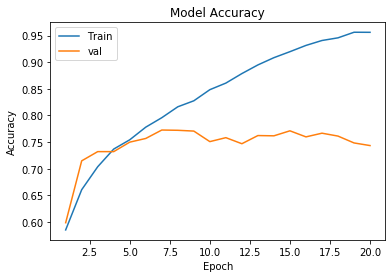

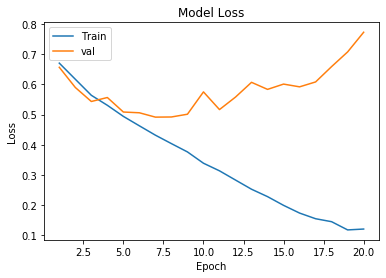

In [ ]:
learning_curve(history, 20)